# First tutoring 01/04/2025

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy import integrate

Variable definition

In [105]:
variable = 6.5
type (variable)

%whos float  #gives indications over what variable is of a certain type

Variable       Type     Data/Info
---------------------------------
BE             float    1.9474400000000003
BE_nuc         float    7.558501500000001
amu            float    240.052
compound_amu   float    241.06065999999998
conv_factor    float    931.5
m_n            float    1.00866
m_p            float    1.00782
variable       float    6.5


Lists: in python, the first index of a list is 0 and not 1

In [106]:
list_variable = [1,2,3,4,5]
type(list_variable)
list_variable[-1]   #the -1 index gives the last element of the list
len (list_variable) #gives the length of the list


5

In [107]:
list_variable[0:]  # shows the while list
list_variable[0:2] # shows the first two elements of the list
list_variable[0::2] # shows the first element and then every second element

[1, 3, 5]

## List of nuclides and their barrier energies

In [108]:
nuclides = ['232-Th', '233-Th', '233-U', '234-U', '235-U', '236-U', '238-U', '239-U', '239-Pu', '240-Pu']
type(nuclides)
barrier_energy = [5.9, 6.5, 5.5, 4.6, 5.75, 5.3, 5.85, 5.5, 5.5, 4.6]


In [109]:
dictionary = {
    '232-Th':[5.9,232.038, 90],    #The dictionary is a key-value pair that associates a key (Th-232) with a value (5.9)
    '233-Th':[6.5,233.041, 90],   #The value can be anything: a value, a list, a function etc.
    '233-U':[5.5, 233.040, 92],   #In this case, the dictionary is a list of lists and not a matrix.
    '234-U':[4.6, 234.041, 92],   #We have that the key is the name of the nuclide, the value is a list with the barrier energy, the atomic mass and the atomic number.
    '235-U':[5.75, 235.042, 92],
    '236-U':[5.3, 236.043, 92],
    '238-U':[5.85, 238.050, 92],
    '239-U':[5.5, 239.051, 92],
    '239-Pu':[5.5, 239.051, 94],
    '240-Pu':[4.6, 240.052, 94]
}
dictionary.items()  #shows the key-value pair
dictionary.keys()   #shows the keys
dictionary.values() #shows the values
list(dictionary.keys()) #transforms the keys into a list
list(dictionary.values()) #transforms the values into a list

[[5.9, 232.038, 90],
 [6.5, 233.041, 90],
 [5.5, 233.04, 92],
 [4.6, 234.041, 92],
 [5.75, 235.042, 92],
 [5.3, 236.043, 92],
 [5.85, 238.05, 92],
 [5.5, 239.051, 92],
 [5.5, 239.051, 94],
 [4.6, 240.052, 94]]

The list() command converts any variable into a string. There are other commands to transform variable types into
int, float, etc.

In [110]:
values = list(dictionary.values())
len(values)
list1=values[0]
len(list1)

3

In [111]:
dictionary1  = {
    '232-Th':{                    #232-th is the main key, all the other keys are subkeys
        'barrier_value':5.9,      #The dictionary can also be a dictionary of dictionaries.
        'atomic_mass':232.08,
        'Z':90
    }
}

dictionary1.keys()
dictionary1['232-Th']                   #this command extracts the dictionary associated with the key '232-Th'
dictionary1['232-Th']['barrier_value']  #this command extracts the value associated with the key 'barrier_value' in the dictionary associated with the key '232-Th'


5.9

We now see how to build a dictionary using "for" cycles

In [112]:
values = list(dictionary.values())

barrier_values = list()
amu_values =[]            # these are three lists containing nothing. The commands below will append values to them
z_values = []             # the syntax of the three commands is equivalent


values[0][0]    #this extracts the first value of the first dictionary in the list

#barrier_values.append(values[0][0])  #this appends the first value of the first dictionary (barrier energy value) in the list to the list barrier_values
#amu_values.append(values[0][1])       #this appends the second value of the first dictionary (amu values) in the list to the list amu_values
#z_values.append(values[0][2])         #this appends the third value of the first dictionary (atomic number) in the list to the list z_values

#the append command adds an element to the end of the list and does not modify the other elements of the list


for i in range(0, len(values)):  #this loop will iterate over all the dictionaries in the list values
    barrier_values.append(values[i][0])  #this will append the barrier energy value of the i-th dictionary to the list barrier_values
    amu_values.append(values[i][1])       #this will append the amu value of the i-th dictionary to the list amu_values
    z_values.append(values[i][2])         #this will append the atomic number of the i-th dictionary to the list z_values

print(barrier_values)
print(amu_values)
print(z_values)

[5.9, 6.5, 5.5, 4.6, 5.75, 5.3, 5.85, 5.5, 5.5, 4.6]
[232.038, 233.041, 233.04, 234.041, 235.042, 236.043, 238.05, 239.051, 239.051, 240.052]
[90, 90, 92, 92, 92, 92, 92, 92, 94, 94]


We create a new dictionary and fill it with the lists we just created

In [113]:
data = {}

for i in range(len(nuclides)):
    data[nuclides[i]] = {
        'barrier_value': barrier_values[i],
        'atomic_mass': amu_values[i],
        'Z': z_values[i]
    }

data

{'232-Th': {'barrier_value': 5.9, 'atomic_mass': 232.038, 'Z': 90},
 '233-Th': {'barrier_value': 6.5, 'atomic_mass': 233.041, 'Z': 90},
 '233-U': {'barrier_value': 5.5, 'atomic_mass': 233.04, 'Z': 92},
 '234-U': {'barrier_value': 4.6, 'atomic_mass': 234.041, 'Z': 92},
 '235-U': {'barrier_value': 5.75, 'atomic_mass': 235.042, 'Z': 92},
 '236-U': {'barrier_value': 5.3, 'atomic_mass': 236.043, 'Z': 92},
 '238-U': {'barrier_value': 5.85, 'atomic_mass': 238.05, 'Z': 92},
 '239-U': {'barrier_value': 5.5, 'atomic_mass': 239.051, 'Z': 92},
 '239-Pu': {'barrier_value': 5.5, 'atomic_mass': 239.051, 'Z': 94},
 '240-Pu': {'barrier_value': 4.6, 'atomic_mass': 240.052, 'Z': 94}}

### Now we want to compute the binding energy per nucleon for each nuclide

$B_e = c^2[Z\cdot m_p + N\cdot m_n - amu]$
$\\ B_e(MeV/nucleon) = B_e\cdot \frac{MeV}{A}$

$\\ amu_{compound} = amu + m_n$
$\\ LNB_e = amu-amu_{compound} = last\, neutron\, binding\, energy$

In [114]:
m_n = 1.00866
m_p = 1.00782
conv_factor = 931.5   #the number needed to go from kg*km^2/s^2 to MeV

#We will now cycle over all nuclides
for i in range (0,len(nuclides)):

    amu = data[nuclides[i]]['atomic_mass']
    Z = data[nuclides[i]]['Z']
    a = round(amu)
    n = a - Z      #number of neutrons

    BE = n * m_n + Z * m_p - amu
    BE_nuc = BE * (conv_factor / a)
    compound_amu = amu + m_n

    data[nuclides[i]]['BE'] = BE
    data[nuclides[i]]['BE_nuc'] = BE_nuc
    data[nuclides[i]]['compound_amu'] = compound_amu

data


{'232-Th': {'barrier_value': 5.9,
  'atomic_mass': 232.038,
  'Z': 90,
  'BE': 1.8955199999999763,
  'BE_nuc': 7.610676206896456,
  'compound_amu': 233.04666},
 '233-Th': {'barrier_value': 6.5,
  'atomic_mass': 233.041,
  'Z': 90,
  'BE': 1.9011799999999823,
  'BE_nuc': 7.600640214592204,
  'compound_amu': 234.04966},
 '233-U': {'barrier_value': 5.5,
  'atomic_mass': 233.04,
  'Z': 92,
  'BE': 1.9004999999999939,
  'BE_nuc': 7.597921673819718,
  'compound_amu': 234.04865999999998},
 '234-U': {'barrier_value': 4.6,
  'atomic_mass': 234.041,
  'Z': 92,
  'BE': 1.908159999999981,
  'BE_nuc': 7.59594461538454,
  'compound_amu': 235.04966},
 '235-U': {'barrier_value': 5.75,
  'atomic_mass': 235.042,
  'Z': 92,
  'BE': 1.915819999999968,
  'BE_nuc': 7.593984382978597,
  'compound_amu': 236.05066},
 '236-U': {'barrier_value': 5.3,
  'atomic_mass': 236.043,
  'Z': 92,
  'BE': 1.9234799999999552,
  'BE_nuc': 7.5920407627116875,
  'compound_amu': 237.05166},
 '238-U': {'barrier_value': 5.85,
  '

In [115]:
data['232-Th']['LNBE'] = conv_factor*(data['232-Th']['compound_amu']-data['233-Th']['atomic_mass'])
data['232-Th']['LNBE']

5.272290000005583

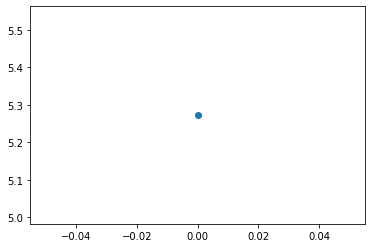

In [116]:
plt.scatter(0,data['232-Th']['LNBE'])

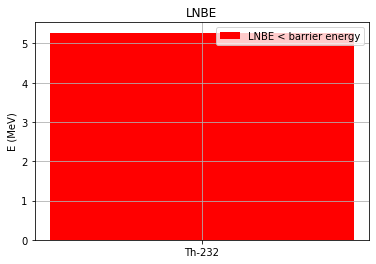

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
if data['232-Th']['LNBE'] > data['232-Th']['barrier_value']:
    barcolor = 'green'
    statement = 'LNBE > barrier energy'
else:
    barcolor = 'red'
    statement = 'LNBE < barrier energy'


plt.bar('Th-232',data['232-Th']['LNBE'], color=barcolor)
plt.title('LNBE')
plt.ylabel('E (MeV)')
plt.grid()
plt.legend([statement])
plt.show()

We now use the numpy library

In [137]:
arr = np.array([0,1,2,3,4])
arr.shape  #gives the shape of the array
arr.size   #gives the number of elements in the array

arr = np.array([       #this gives a 2d matrix which is not a list of lists but a mathematicl element
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

arr = np.zeros(5)  #this gives a 1d array of zeros (a vector of zeros) with 5 elements
arr = np.ones((5,5)) #this gives a 2d array of ones with 5 rows and 5 columns

energy = np.arange(0,15,0.001)  #this gives an array of numbers from 0 to 15 with a step of 0.0001
energy.shape
energy = np.linspace(0,15,1000)  #this gives an array of 1000 numbers divided equally from 0 to 15
#arange and linspace give the same result with a different syntax


In [138]:
energy* 10**-6  #this multiplies all the elements of the array by 10^-6 (eV to MeV). We cannot do this with lists


array([0.00000000e+00, 1.50150150e-08, 3.00300300e-08, 4.50450450e-08,
       6.00600601e-08, 7.50750751e-08, 9.00900901e-08, 1.05105105e-07,
       1.20120120e-07, 1.35135135e-07, 1.50150150e-07, 1.65165165e-07,
       1.80180180e-07, 1.95195195e-07, 2.10210210e-07, 2.25225225e-07,
       2.40240240e-07, 2.55255255e-07, 2.70270270e-07, 2.85285285e-07,
       3.00300300e-07, 3.15315315e-07, 3.30330330e-07, 3.45345345e-07,
       3.60360360e-07, 3.75375375e-07, 3.90390390e-07, 4.05405405e-07,
       4.20420420e-07, 4.35435435e-07, 4.50450450e-07, 4.65465465e-07,
       4.80480480e-07, 4.95495495e-07, 5.10510511e-07, 5.25525526e-07,
       5.40540541e-07, 5.55555556e-07, 5.70570571e-07, 5.85585586e-07,
       6.00600601e-07, 6.15615616e-07, 6.30630631e-07, 6.45645646e-07,
       6.60660661e-07, 6.75675676e-07, 6.90690691e-07, 7.05705706e-07,
       7.20720721e-07, 7.35735736e-07, 7.50750751e-07, 7.65765766e-07,
       7.80780781e-07, 7.95795796e-07, 8.10810811e-07, 8.25825826e-07,
      

We introduce the watt spectrum, which is the energy spectrum of fission neutrons:
$Ce^{-\frac{E}{a}}sinh(\sqrt{bE})$

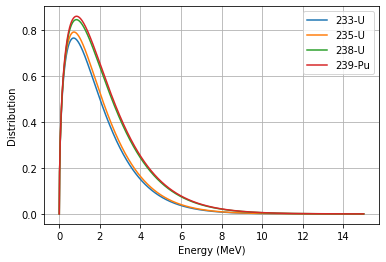

In [ ]:
C = 1
a= [0.96, 0.965, 1.08, 1.08] 
b= [2.2, 2.29, 2.23, 2.28]

phi = np.zeros((len(energy), len(a)))   #phi is a 1000*4 array of zeros

for i in range(len(a)):

    phi[:,i] = C*np.exp(-energy/a[i])*np.sinh(np.sqrt(b[i]*energy))   #in column i we save the values of the distribution for the i-th value of a and b


nuc = ['233-U', '235-U', '238-U', '239-Pu']


plt.plot(energy,phi)
plt.grid()
plt.xlabel('Energy (MeV)')
plt.ylabel('Distribution')
plt.legend(nuc)

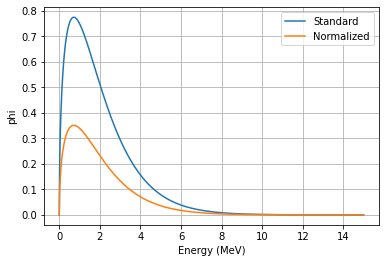

In [164]:
def spectrum (E, a, b, C):
    phi_fun =  C*np.exp(-E/a)*np.sinh(np.sqrt(b*E))
    return phi_fun

phi_ = spectrum(energy, 0.965, 2.23, 1)
phi_norm = spectrum (energy, 0.965, 2.23, 0.453)

plt.plot(energy, phi_, label = 'Standard')    #this only plots one of the four spectra
plt.plot (energy, phi_norm, label = 'Normalized') #this plots the normalized spectrum
plt.ylabel('phi') 
plt.xlabel('Energy (MeV)')
plt.legend() 
plt.grid()
plt.show()

# Second tutoring 10/04/2025

This time we deal with an actual Maxwellian distribution

$p(v) = 4\pi (\frac{m}{2\pi kT})^{\frac{3}{2}}v^2e^{-\frac{mv^2}{2kT}}$

In [4]:
k_B = 1.38e-23
m_n = 1.67e-27
T = 300

def maxwell_boltzmann (v,T):
    '''This function calculates the Maxwell-Boltzmann distribution 
    for a given velocity v(m/s) and temperature T(K).'''
    global coeff
    coeff = (m_n/(2*np.pi*k_B*T))**(3/2)*4*np.pi
    exponent = -m_n*v**2/(2*k_B*T)
    pv = v**2*coeff*np.exp(exponent)
    return pv


# We can also use a lambda function to define the same function
pv = lambda v,T: (m_n/(2*np.pi*k_B*T))**(3/2)*4*np.pi*v**2*np.exp(-m_n*v**2/(2*k_B*T))

''' 
to use the lambda function we can call it using pv(arguments). 
The lambda functions are useful only if we have single line functions 
'''
help (maxwell_boltzmann)   # This command gives all the comments written in the function as we can write useful information inside them.




Help on function maxwell_boltzmann in module __main__:

maxwell_boltzmann(v, T)
    This function calculates the Maxwell-Boltzmann distribution 
    for a given velocity v(m/s) and temperature T(K).



Text(0, 0.5, 'M-B distribution')

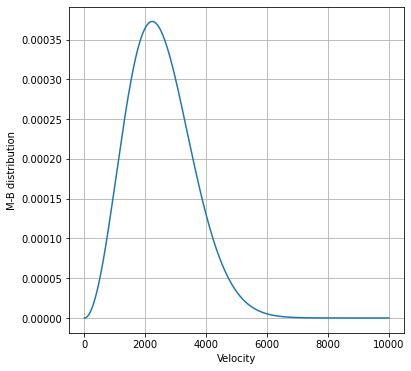

In [11]:
v0=0
vf = 10**4
dv = 0.1

v = np.arange(v0, vf, dv)  #this gives an array of numbers from v0 to vf with a step of dv
f = maxwell_boltzmann(v,T)

plt.figure(figsize=(6,6))  #With this we set the dimensions of the graph
plt.plot(v,f)
plt.grid()
plt.xlabel('Velocity')
plt.ylabel('M-B distribution')

In [ ]:
# We want to see that the function is normalized

int_rectangles = 0

for i in range (len(v)):
    f = maxwell_boltzmann(v[i], T)
    int_rectangles = int_rectangles+f*dv    # this is a manual method to do an integral

error = 1-int_rectangles

print(f'Manual integration: {int_rectangles:.7f}')    # This tells python to print the value contained in the variable as a string, the :.7f truncates the output at the seventh decimal digit (f stands for float)
print('Manual integration: '+str(int_rectangles))    # This does the same thing by converting a number into a string and printing two strings one after the other
print('Manual integration: %f' %int_rectangles)



Manual integration: 1.0000000
Manual integration: 0.999999990964456
Manual integration: 1.000000


In [ ]:
# We can also compute an integral using libraries (numpy, scipy)
# Scipy can do integrals, odes, derivatives, minimum/maximum problems, eigenvalues problems, signal processing, etc

# scipy also contains the bessel functions
help(integrate)

In [ ]:
# We use the trapezoidal rule to integrate
integrate.trapezoid(maxwell_boltzmann(v,T), v) # The ,v is used to specify the variable of integration

np.float64(0.9999999909626737)

In [ ]:
integrate.simpson(maxwell_boltzmann(v,T))  # this uses the simpson rule to integrate

np.float64(9.99999990962674)

In [ ]:
integrate.quad(maxwell_boltzmann, v0, vf, args=(T,))    # This method is an iteration method and also gives the difference between the last and second to last cycle


(0.9999999909662325, 6.775458862853193e-13)

In [32]:
# now we want to compute the max of the distribution

max_distr = np.max(maxwell_boltzmann(v,T))
print(max_distr)

# The corrisponding maximum on the x axis is:
max_idx = np.argmax(maxwell_boltzmann(v,T))   # this gives the index on the array of the x axis that corresponds to the maximum on the y axis
print(max_idx)
print(v[max_idx])  # thus, this is the speed that corresponds to the maximum of the ditribution

0.0003728495644970491
22267
2226.7000000000003


## We can use gamma functions to compute integrals:

$\Gamma (x) = \int_{0}^{\infty}t^{x-1}e^{-t}dt$

In [40]:
from scipy import special    # This has the bessel functions

arg = np.arange(0,5,0.5)

for i in range(len(arg)):
    print(f'Gamma({arg[i]}):{special.gamma(arg[i]+1)}')

Gamma(0.0):1.0
Gamma(0.5):0.8862269254527579
Gamma(1.0):1.0
Gamma(1.5):1.329340388179137
Gamma(2.0):2.0
Gamma(2.5):3.323350970447843
Gamma(3.0):6.0
Gamma(3.5):11.63172839656745
Gamma(4.0):24.0
Gamma(4.5):52.34277778455352


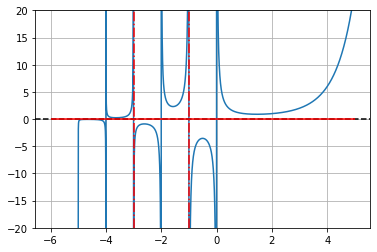

In [ ]:
x=np.arange(-5, 5, 0.0001)
plt.plot(x, special.gamma(x))
plt.ylim([-20, 20])
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')   # This draws a line throughout the entire plot at y=0
plt.hlines(y=0, xmin=-5, xmax=5, color='red')    # This only draws a line at y=0 between specified xmin and xmax

asymptot_ind=np.where(special.gamma(x)>10e4)    # This gives the x axis indexes that satisfy the condition y>10e4
asymptot_val = x[asymptot_ind]

for i in range (len(asymptot_val)):
    plt.axvline(x=asymptot_val[i], color='red', linestyle='-.')

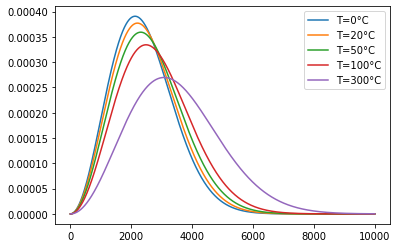

In [52]:
# What happens of we change the temperature?

T = np.array([0, 20, 50, 100, 300])  #celsius
T_K = T+273.15

for i in range (len(T_K)):
    plt.plot(v, maxwell_boltzmann(v,T_K[i]), label=f'T={T[i]}°C')

plt.legend()

In [54]:
# How does the most probable v change with T?

max_idx=np.zeros_like(T)      #This creates an array of zeros with the same dimension of T

for i in range (len(T)):
    f=maxwell_boltzmann(v,T_K[i])
    max_idx[i]= np.argmax(f)
    print(f'Most probable speed at temperature {T[i]}°C: {v[max_idx[i]]}m/s')

Most probable speed at temperature 0°C: 2124.7000000000003m/s
Most probable speed at temperature 20°C: 2201.1m/s
Most probable speed at temperature 50°C: 2311.0m/s
Most probable speed at temperature 100°C: 2483.4m/s
Most probable speed at temperature 300°C: 3077.7000000000003m/s


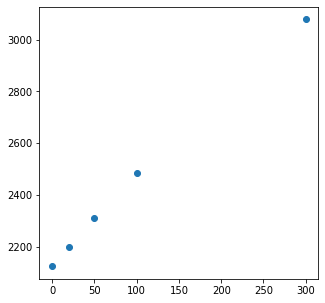

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(T, v[max_idx])

Text(0, 0.5, 'Most probable speed (m/s)')

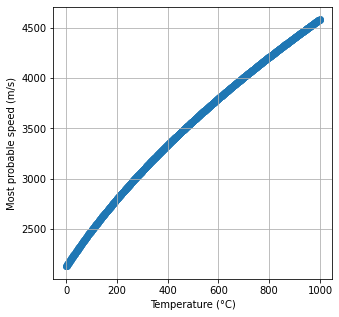

In [59]:
T = np.arange(0,1000,1)
T_K = T+273.15
max_idx=np.zeros_like(T)      #This creates an array of zeros with the same dimension of T

for i in range (len(T)):
    f=maxwell_boltzmann(v,T_K[i])
    max_idx[i]= np.argmax(f)

plt.figure(figsize=(5,5))
plt.scatter(T, v[max_idx])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('Most probable speed (m/s)')